# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.
 
nn
>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of Validation examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Image data shape = {}".format(X_train[0].shape))
print("Number of training examples   = {}".format(n_train))
print("Number of validation examples = {}".format(n_valid))
print("Number of testing examples    = {}".format(n_test))
print("Number of classes = {}".format(n_classes))

Image data shape = (32, 32, 3)
Number of training examples   = 34799
Number of validation examples = 4410
Number of testing examples    = 12630
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

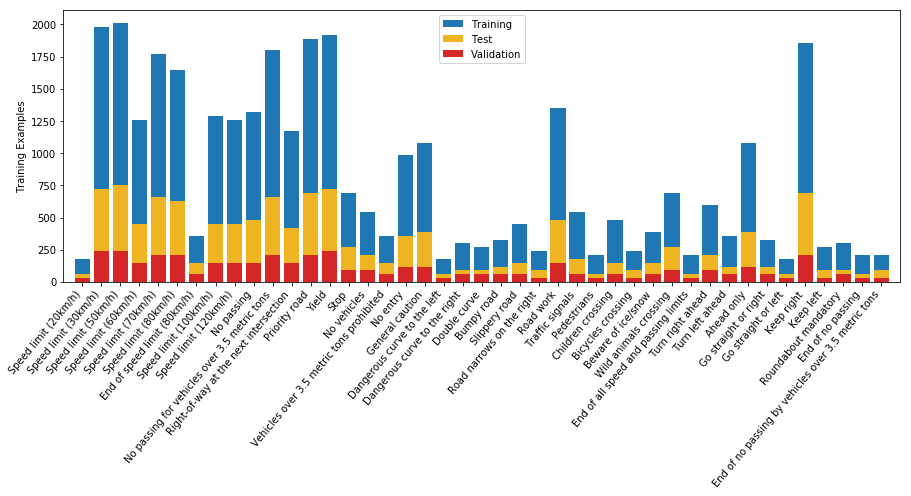

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
import random

%matplotlib inline

signnames = read_csv("signnames.csv").values[:, 1]

classes_train, counts_train = np.unique(y_train, return_counts = True)
classes_valid, counts_valid = np.unique(y_valid, return_counts = True)
classes_test, counts_test = np.unique(y_test, return_counts = True)

plt.figure(figsize=(15,5))

p1 = plt.bar(np.arange(n_classes), counts_train)
p2 = plt.bar(np.arange(n_classes), counts_test, color='#eeb422')
p3 = plt.bar(np.arange(n_classes), counts_valid, color='#d62728')

plt.xticks( np.arange(n_classes), signnames, rotation=50, horizontalalignment='right')
plt.ylabel('Training Examples')
plt.legend((p1[0], p2[0], p3[0]), ('Training', 'Test', 'Validation'))
plt.xlim([-1, 43])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import cv2

def dataGen(X_train, y_train):
    
    dataGen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        rescale=1./255)   

    train_aug = dataGen.flow(X_train, y_train, batch_size=X_train.shape[0])
    
    counter = 0
    for X_batch, Y_batch in train_aug:
        X_train = np.append(X_train, X_batch, axis=0)
        y_train = np.append(y_train, Y_batch, axis=0)
        counter += 1
        if counter >= 2:
            break
    
    return X_train, y_train

def preprocess(images):
    X_train_normalized = np.ndarray(shape=(len(images),32,32,1))
    count = 0
    for x in images:
        image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        image = clahe.apply(image)
        image = (image / (255. - .5)).astype(np.float32)
        X_train_normalized[count] = np.expand_dims(image, axis=2)
        count += 1
    return X_train_normalized

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

X_train, y_train = shuffle(X_train, y_train)

Using TensorFlow backend.


### Model Architecture

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, ActivityRegularization

def YazNet():
    model = Sequential()
    model.add(Convolution2D(128, 5, 5, input_shape=(32, 32, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Convolution2D(256, 5, 5))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Convolution2D(512, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(n_classes))
    model.add(Activation('sigmoid'))
    
    return model

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

EPOCHS = 100
BATCH_SIZE = 1024

model = YazNet()

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                  patience=5, min_lr=0.001)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0)

# Compile and Run
model.compile('adadelta', "sparse_categorical_crossentropy", ["accuracy"])
model.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, shuffle=True, validation_data=(X_valid, y_valid), callbacks=[reduce_lr, earlyStopping])

(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

print("\n================= Test Accuracy ==================")
print("Test Set Accuracy = {:.2f}%".format(accuracy * 100))

Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 23s - loss: 3.3498 - acc: 0.1671 - val_loss: 3.6694 - val_acc: 0.0546

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Predict New Images

Actual: Double curve


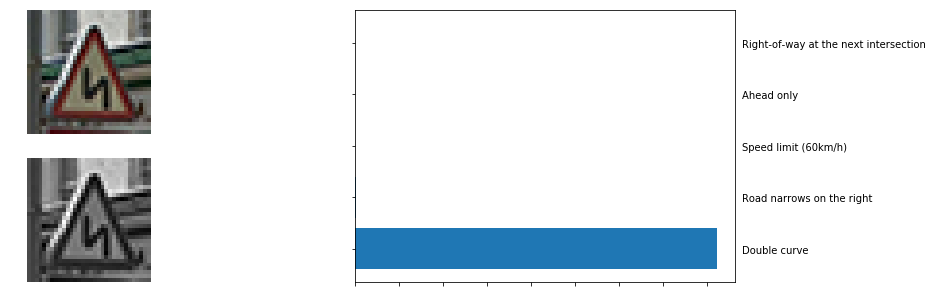

Actual: No entry


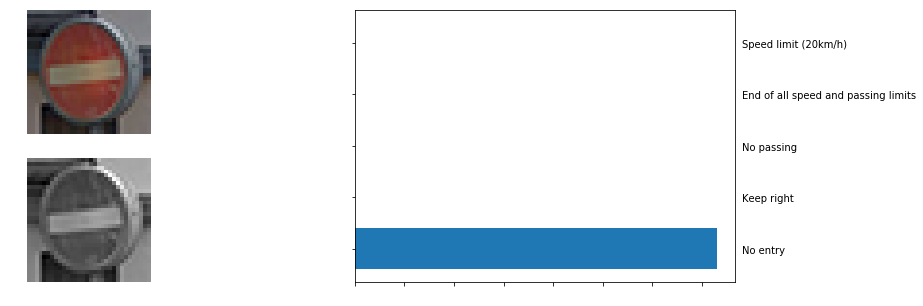

Actual: Turn left ahead


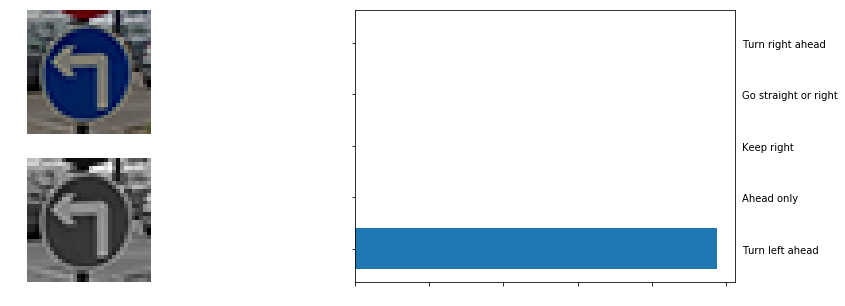

Actual: Roundabout mandatory


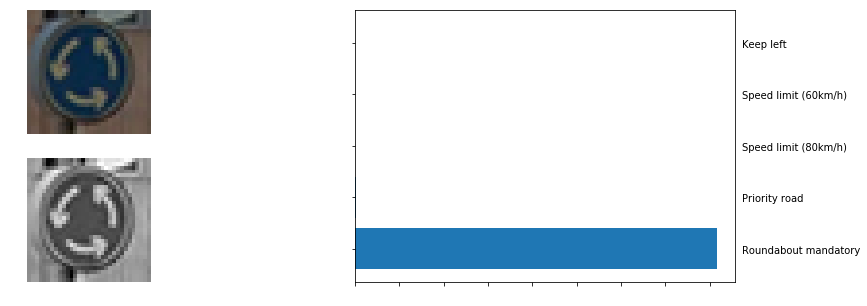

Actual: Speed limit (20km/h)


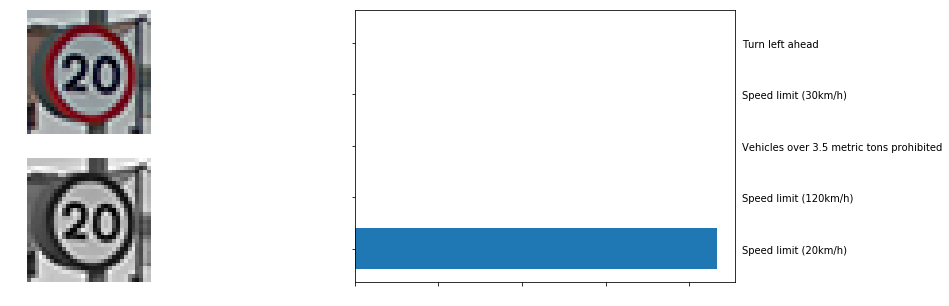

In [57]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from keras.preprocessing import image

img_path = [[21,'new_data/1.png'],
            [17,'new_data/2.png'],
            [34,'new_data/3.png'],
            [40,'new_data/4.png'], 
            [0,'new_data/5.png']]

correct = 0
for actual,path in img_path:
    img_actual = image.load_img(path, target_size=(32, 32))
    img = image.img_to_array(img_actual)
    
    # preprocess
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = (img / (255. - .5)).astype(np.float32)
    
    x = np.ndarray(shape=(1,32,32,1))
    x[0] = np.expand_dims(img, axis=2)
    
    prediction = model.predict_proba(x, verbose=0)
    
    top_5 = prediction[0].argsort()[-5:][::-1]
    
    plt.figure(figsize = (15, 5))
    
    # Show actual image
    plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    plt.imshow(img_actual)
    plt.axis('off')

    # Show preprocessed image
    plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    # Show softmax top 5 prediction
    plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    plt.yticks(np.arange(5), signnames[top_5])
    plt.barh(np.arange(5), prediction[0][top_5], align='center')
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    print("Actual: {}".format(signnames[actual]))
    plt.show()
    
    if actual == top_5[0]:
        correct += 1

In [58]:
print("\n================= Prediction Accuracy ==================")
print("Prediction Accurecy: {:.2f}%".format(correct/5 * 100))


================= Prediction Accuracy ==================
Prediction Accurecy: 100.00%
